In [1]:
# utilities : 
import re # regular expression library
import numpy as np
import pandas as pd

# plotting :
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk :
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer

# sklearn :
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_repo
rt

# time library :
import time

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Importing the dataset :
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1" #This encoding is commonly used for datasets containing characters from Western European languages, as it supports a wider range of characters compared to ASCII encoding.
df = pd.read_csv('training.1600000.processed.noemoticon.csv', 
                 encoding=DATASET_ENCODING, 
                 names=DATASET_COLUMNS)

# Displaying  5 lines randomly 
df.sample(5)

,target,ids,date,flag,user,text
861947,4,1676783741,Fri May 01 23:11:00 PDT 2009,NO_QUERY,aaalison,@billbeckett ...I think they ran out of ideas....
28300,0,1559604644,Sun Apr 19 11:34:36 PDT 2009,NO_QUERY,qbs_mom,Is back in bed suffering thru a horrible heada...
983970,4,1834341330,Mon May 18 02:33:55 PDT 2009,NO_QUERY,brooklynoop,@LstInTheSeeThru http://twitpic.com/5f228 - I ...
1164630,4,1979774412,Sun May 31 04:27:11 PDT 2009,NO_QUERY,thk8r,is looking forward to looonch on the balcony i...
82440,0,1753052212,Sat May 09 23:57:04 PDT 2009,NO_QUERY,xa84te,honestly didn't know it was mother's day till ...


# Exploratory Data Analysis

In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.shape

(1600000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [7]:
#Checking the distribution of classes
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

The **`target`** column is composed of just **0** and **4**

**0** stands for `negative` sentiment.

**4** stands for `positive` sentiment.

In [8]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [9]:
df.groupby('target').count()

,ids,date,flag,user,text
target,,,,,
0,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000


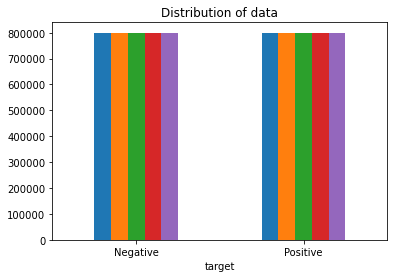

In [10]:
# Plotting the distribution for dataset :
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
text, sentiment = list(df['text']), list(df['target'])
#The lists text and sentiment are created for further analysis or processing outside the plot, containing the text and sentiment values from the DataFrame, respectively.

In the above graph there are 5 colours each of each are representing columns **`ids`**, **`date`**, **`flag`**, **`user`**	and **`text`**.

<AxesSubplot:xlabel='target', ylabel='count'>

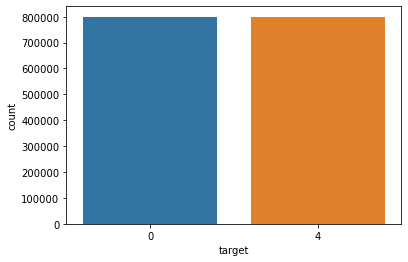

In [11]:
sns.countplot(x='target', data=df)

Here 0 represents **Negative** tweet

While 4 represents **Positive** tweet

## Data Preprocession 

In [12]:
# Selecting only the features required for our further analysis :
df = df[['text','target']]

In [13]:
df['target'] = df['target'].replace(4,1) #Replacing class 4 with 1 so wo 1 will represent positive tweets

In [14]:
df['target'].unique()

array([0, 1], dtype=int64)

In [15]:
# Separating positive and negative tweets :
positive = df[df['target'] == 1]
negative = df[df['target'] == 0]

In [16]:
# Combining positive and negative tweets :
dataset = pd.concat([positive, negative])

The dataset will now have clear separation of positive and negative sentiments.

1st half will contain the **Positive** Tweets.

2nd half will contain the **Negatuve** Tweets.

In [17]:
dataset['text'] = dataset['text'].str.lower() #Making all the text lower to avoid case sensitive issues
dataset.sample(5)

,text,target
1058430,got a new perfume yesterday. been smelling mys...,1
1183434,@blatter you've done well,1
818802,"@apshai ahh, okay, i feel better now. still w...",1
853854,"@foodstories amazing i can't wait now, im goi...",1
752319,"@allieandra what? no?? ... oh shit, you're right",0


In [18]:
import nltk

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:


def stemming(text):
    stemmer = PorterStemmer()
    
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords and apply stemming
    stemmed_words = [stemmer.stem(word) for word in words if word.lower() not in stopwords.words('english')]
    
    # Join the stemmed words back into a single string
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text

example_text = "I am doing Bachelors in data Science"
stemmed_text = stemming(example_text)
print(stemmed_text)

bachelor data scienc


In [22]:
dataset['text'] = dataset['text'].apply(stemming)
print(dataset)

                                                     text  target
800000                   love health uandpet u guy r best       1
800001      im meet one besti tonight cant wait girl talk       1
800002  darealsunisakim thank twitter add sunisa got m...       1
800003  sick realli cheap hurt much eat real food plu ...       1
800004                       lovesbrooklyn effect everyon       1
...                                                   ...     ...
799995          sick spend day lay bed listen taylorswift       0
799996                                              gmail       0
799997                               rest peac farrah sad       0
799998    eric urban sound like rival flag ad much though       0
799999  resit exam summer wish work harder first year uni       0

[1600000 rows x 2 columns]


In [63]:
X = dataset['text']
Y = dataset['target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.2,stratify = Y,random_state=1)

In [64]:
print(X)


800000                     love health uandpet u guy r best
800001        im meet one besti tonight cant wait girl talk
800002    darealsunisakim thank twitter add sunisa got m...
800003    sick realli cheap hurt much eat real food plu ...
800004                         lovesbrooklyn effect everyon
                                ...                        
799995            sick spend day lay bed listen taylorswift
799996                                                gmail
799997                                 rest peac farrah sad
799998      eric urban sound like rival flag ad much though
799999    resit exam summer wish work harder first year uni
Name: text, Length: 1600000, dtype: object


In [65]:
print(Y)

800000    1
800001    1
800002    1
800003    1
800004    1
         ..
799995    0
799996    0
799997    0
799998    0
799999    0
Name: target, Length: 1600000, dtype: int64


#### TfidfVectorizer
The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

TF-IDF: Term Frequency-Inverse Document Frequency (TF-IDF) is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents.

Term Frequency (TF): It measures the frequency of a term (word) in a document. It increases with the number of occurrences of the term in the document.

Inverse Document Frequency (IDF): It measures how important a term is across multiple documents in the collection. Terms that occur frequently across documents are given a lower weight.

In [66]:
vc = TfidfVectorizer()

X_train = vc.fit_transform(X_train)# fit is used to understand the nature of data
X_test = vc.transform(X_test)


In [67]:
print(X_train.shape)

(1280000, 461470)


In [68]:
print(X_train)

  (0, 408993)	0.20327132937613104
  (0, 106815)	0.37134449965091226
  (0, 347930)	0.4123017384299885
  (0, 317915)	0.30350077343669557
  (0, 227941)	0.2912488589003264
  (0, 266341)	0.3358584555454906
  (0, 239609)	0.20930055750051507
  (0, 364817)	0.37627918401650134
  (0, 341504)	0.41911697481409166
  (1, 324565)	0.5346829742944466
  (1, 240356)	0.32757289154579433
  (1, 411414)	0.28912454600209647
  (1, 181329)	0.5247713457687215
  (1, 286003)	0.49782742921934126
  (2, 306992)	0.41244791725873703
  (2, 129981)	0.27792888797524024
  (2, 118466)	0.8675495656028976
  (3, 15081)	0.44595664917320677
  (3, 244938)	0.24365166869261953
  (3, 136559)	0.2030585102219242
  (3, 165909)	0.30014312059830567
  (3, 15061)	0.15048519407525865
  (3, 125918)	0.2975473828320111
  (3, 439080)	0.1893315187082751
  (3, 375837)	0.24345453849281473
  :	:
  (1279995, 162976)	0.5039996612991468
  (1279995, 44681)	0.3863978701646447
  (1279995, 411670)	0.372838323110258
  (1279995, 15061)	0.2448880314664291
  

The format (row_index, column_index) value indicates the position and the value of the non-zero 
elements .

For example, (0, 408993) 0.20327132937613104 means that in tweet 0, the term with index 408993 has 

a weight (TF-IDF score, for instance) of approximately 0.203.


In [69]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(Y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(Y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# SVM (Support Vector Machine).


The execution time of this model is 51.91 seconds

              precision    recall  f1-score   support

           0       0.78      0.76      0.77    160000
           1       0.76      0.78      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



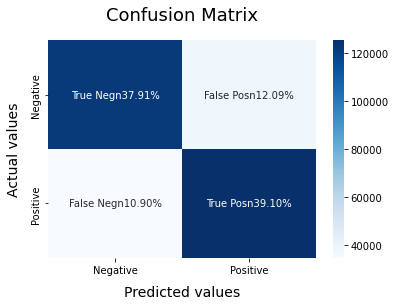

In [70]:
SVCmodel = LinearSVC()
start = time.time()
SVCmodel.fit(X_train, Y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)#y_pred2 will be an array or a list containing the predicted labels for the samples in the test dataset X_test.

# Bernoulli Naive Bayes.


The execution time of this model is 1.10 seconds

              precision    recall  f1-score   support

           0       0.75      0.79      0.77    160000
           1       0.78      0.74      0.76    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



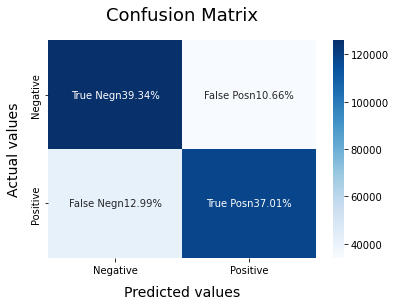

In [71]:
BNBmodel = BernoulliNB()
start = time.time()
BNBmodel.fit(X_train, Y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)#y_pred1 will be an array or a list containing the predicted labels for the samples in the test dataset X_test.

# Saving Our trained model

In [ ]:
import pickle

# Save the trained model to a file
with open("model_filename.pkl", "wb") as file:
    pickle.dump(SVCmodel, file)
# Load the model from the file
with open("model_filename.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded model to make predictions or perform other tasks
model_score = loaded_model.score(X_test, Y_test)
model_score

# User Interface Design

In [ ]:
import tkinter as tk

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

# Initialize TfidfVectorizer and transform the text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train your machine learning model
model = LinearSVC()
model.fit(X_train_tfidf, Y_train)

# Function to get prediction
def get_prediction():
    input_text = text_entry.get("1.0",'end-1c')  # Get input text from Text widget
    text_tfidf = tfidf_vectorizer.transform([input_text])  # Transform input text
    prediction = model.predict(text_tfidf)[0]  # Make prediction
    result_label.config(text=f"Prediction: {prediction}")  # Display prediction

# Create Tkinter window
window = tk.Tk()
window.title("Text Classification")

# Create Text widget for input
text_entry = tk.Text(window, height=10, width=40)
text_entry.pack(pady=10)

# Create button to get prediction
predict_button = tk.Button(window, text="Get Prediction", command=get_prediction)
predict_button.pack()

# Create label to display prediction
result_label = tk.Label(window, text="")
result_label.pack()

# Start Tkinter event loop
window.mainloop()
